In [46]:
import sys
sys.path.insert(0, '..')
from __future__ import annotations

import os
import pytest

In [47]:
from src.eventstream import Eventstream, EventstreamSchema, RawDataSchema
import pandas as pd
from src.tooling.cohorts import Cohorts

raw_data_schema = RawDataSchema(
    event_name="event", event_timestamp="timestamp", user_id="user_id")


In [34]:
FLOAT_PRECISION = 2


In [224]:
df_df = pd.DataFrame([
    [1, "event", "raw", "2021-12-28 00:01:00"],
    [2, "event", "raw", "2021-12-28 00:01:00"],
    [1, "event", "raw", "2022-01-03 00:01:00"],
    [2, "event", "raw", "2022-01-04 00:01:00"],
    [3, "event", "raw", "2022-01-05 00:02:00"],
    [4, "event", "raw", "2022-01-06 00:03:00"],
    [5, "event", "raw", "2022-01-07 00:07:00"],
    [6, "event", "raw", "2022-01-08 00:08:00"],
    [1, "event", "raw", "2022-01-13 00:01:00"],
    [2, "event", "raw", "2022-01-15 00:01:00"],
    [1, "event", "raw", "2022-02-03 00:01:00"],
    [2, "event", "raw", "2022-02-04 00:01:00"],
    [3, "event", "raw", "2022-02-05 00:02:00"],
    [4, "event", "raw", "2022-02-06 00:03:00"],
    [5, "event", "raw", "2022-02-07 00:07:00"],
    [6, "event", "raw", "2022-02-08 00:08:00"],
    [7, "event", "raw", "2022-02-06 00:03:00"],
    [8, "event", "raw", "2022-02-07 00:07:00"],
    [9, "event", "raw", "2022-02-08 00:08:00"],
    [7, "event", "raw", "2022-03-06 00:03:00"],
    [9, "event", "raw", "2022-03-08 00:08:00"],
    [10, "event", "raw", "2022-03-03 00:01:00"],
    [2, "event", "raw", "2022-04-04 00:01:00"],
    [3, "event", "raw", "2022-04-05 00:02:00"],
    [8, "event", "raw", "2022-04-07 00:07:00"],
    [10, "event", "raw", "2022-04-03 00:01:00"],
    ],

    columns=["user_id", "event", "event_type", "timestamp"],
        )

source = Eventstream(
    raw_data=df_df,
    raw_data_schema=raw_data_schema,
    schema=EventstreamSchema()
)

In [240]:
cohorts = Cohorts(eventstream=source)

cohorts.fit_cohorts(
                 cohort_start_unit='M',
                 cohort_period=(1,'M'),
                  average=True,
                  cut_bottom=0,
                  cut_right=10,
                  cut_diagonal=0)


ValueError: cannot set a frame with no defined columns

In [238]:
result = cohorts.values.round(FLOAT_PRECISION).fillna(-999)
result

CohortPeriod
CohortGroup


In [233]:
correct_res = pd.DataFrame(
            [[1.0, 1.0, 1.0, -999.0, 0.5],
            [1.0, 1.0, -999.0, 0.25, -999.0],
            [1.0, 0.67, 0.33, -999.00, -999.0],
            [1.0, 1.0, -999.0, -999.00, -999.0]],
            index=pd.Index(['2021-12', '2022-01', '2022-02', '2022-03'],
            name="CohortGroup"),
            columns=pd.Index([0, 1, 2, 3, 4], dtype='int64', name='CohortPeriod')
            )
correct_res

CohortPeriod,0,1,2,3,4
CohortGroup,,,,,
2021-12,1.0,1.00,1.00,-999.00,0.5
2022-01,1.0,1.00,-999.00,0.25,-999.0
2022-02,1.0,0.67,0.33,-999.00,-999.0
2022-03,1.0,1.00,-999.00,-999.00,-999.0


In [234]:
correct_res.compare(result).shape

(0, 0)

CPU times: user 102 ms, sys: 9.44 ms, total: 112 ms
Wall time: 57.5 ms


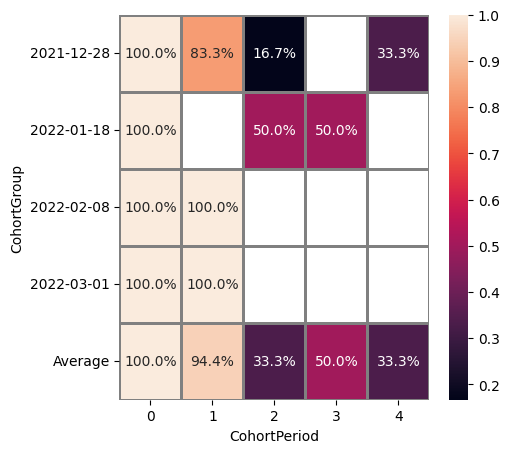

In [50]:
%%time
cohorts.heatmap(figsize=(5,5))

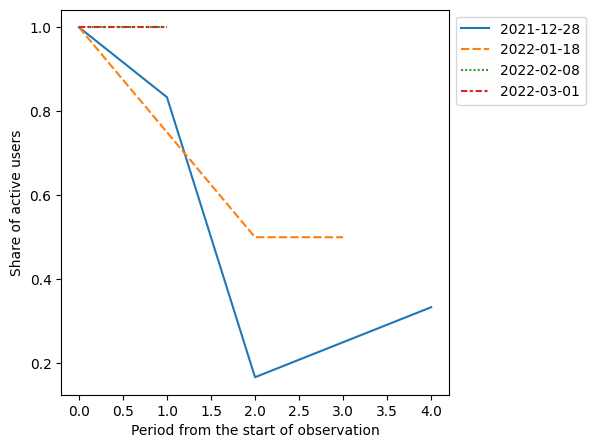

In [53]:
cohorts.lineplot(figsize=(5,5))

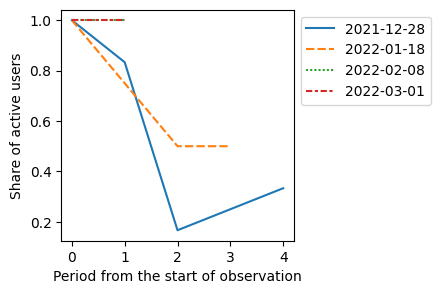

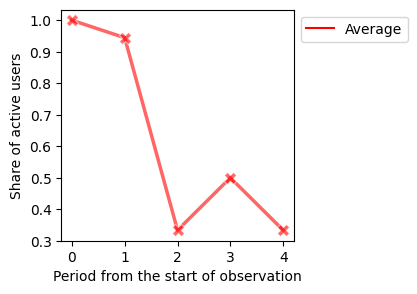

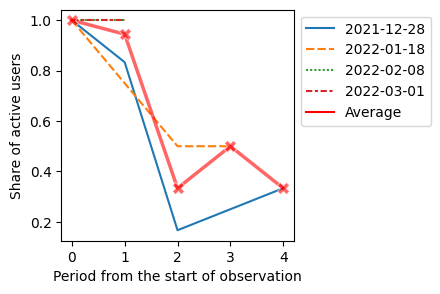

In [54]:
lineplots = ["cohorts", "average", "all"]
for elem in lineplots:
    cohorts.lineplot(figsize=(3,3), show_plot=elem)

In [126]:
source.cohorts.fit_cohorts(cohort_start_unit='D',
                  cohort_period=(7,'D'),
                  average=True,
                  cut_bottom=0,
                  cut_right=0,
                  cut_diagonal=0)

In [127]:
source.cohorts.params

{'cohort_start_unit': 'D',
 'cohort_period': (7, 'D'),
 'average': True,
 'cut_bottom': 0,
 'cut_right': 0,
 'cut_diagonal': 0}

In [11]:
source.cohorts.values

CohortPeriod,0,1,2,3,4
CohortGroup,,,,,
2021-12,1.0,1.000000,1.000000,NaN,0.5
2022-01,1.0,1.000000,NaN,0.25,NaN
2022-02,1.0,0.666667,0.333333,NaN,NaN
2022-03,1.0,1.000000,NaN,NaN,NaN


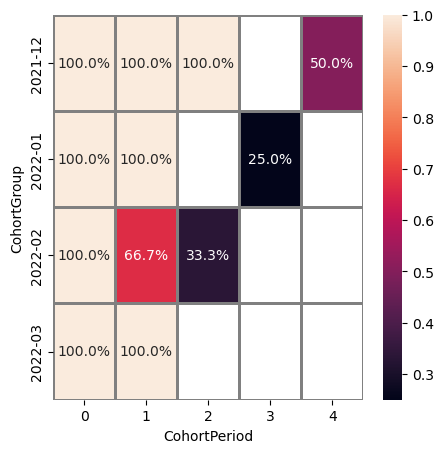

In [12]:
source.cohorts.heatmap(figsize=(5,5))

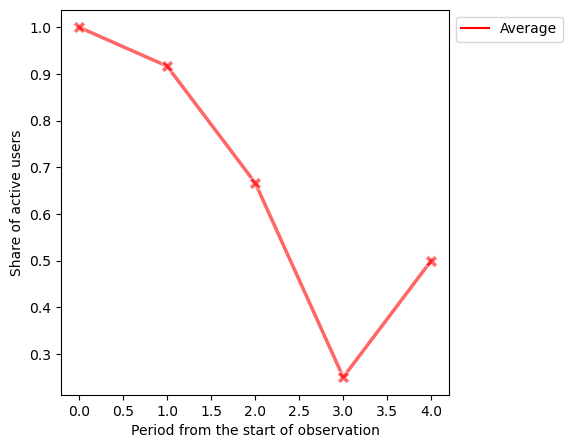

In [13]:
source.cohorts.lineplot(figsize=(5,5), show_plot='average')

In [221]:
def test_stream():
    source_df = pd.DataFrame(
        [
            # открытая, закрытая, закрытая+
            [1, "start", "start", "2022-01-01 00:01:00"],
            [1, "catalog", "raw", "2022-01-01 00:01:00"],
            [1, "product1", "raw", "2022-01-01 00:02:00"],
            [1, "product2", "raw", "2022-01-01 00:03:00"],
            [1, "cart", "raw", "2022-01-01 00:07:00"],
            [1, "payment_done", "raw", "2022-01-01 00:08:00"],
            # открытая
            [2, "start", "start", "2022-02-01 00:01:00"],
            [2, "product1", "raw", "2022-02-01 00:01:00"],
            [2, "product2", "raw", "2022-02-01 00:02:00"],
            [2, "cart", "raw", "2022-02-01 00:07:00"],
            [2, "payment_done", "raw", "2022-02-01 00:08:00"],
            # открытая, закрытая - кроме продукта, закрытая+ только каталог
            [3, "start", "start", "2022-01-01 00:01:00"],
            [3, "product1", "raw", "2022-01-01 00:01:00"],
            [3, "product2", "raw", "2022-01-01 00:02:00"],
            [3, "catalog", "raw", "2022-01-01 00:03:00"],
            [3, "catalog", "raw", "2022-01-01 00:04:00"],
            [3, "product18", "raw", "2022-01-01 00:06:30"],
            [3, "cart", "raw", "2022-01-01 00:07:00"],
            [3, "payment_done", "raw", "2022-01-01 00:08:00"],
            # открытая, закрытая, закрытая+
            [4, "start", "start", "2022-01-01 00:01:00"],
            [4, "catalog", "raw", "2022-01-01 00:01:00"],
            [4, "product1", "raw", "2022-01-01 00:02:00"],
            [4, "product2", "raw", "2022-01-01 00:03:00"],
            [4, "catalog", "raw", "2022-01-01 00:04:00"],
            [4, "product1", "raw", "2022-01-01 00:06:00"],
            [4, "product18", "raw", "2022-01-01 00:06:30"],
            [4, "cart", "raw", "2022-01-01 00:07:00"],
            [4, "payment_done", "raw", "2022-01-01 00:08:00"],
            # открытая
            [5, "start", "start", "2022-01-01 00:01:00"],
            [5, "product1", "raw", "2022-01-01 00:02:00"],
            [5, "product2", "raw", "2022-01-01 00:03:00"],
            [5, "product1", "raw", "2022-01-01 00:06:00"],
            [5, "product18", "raw", "2022-01-01 00:06:30"],
            [5, "cart", "raw", "2022-01-01 00:07:00"],
            [5, "payment_done", "raw", "2022-01-01 00:08:00"],
            # открытая, закрытая - кроме продукта, закрытая+ только каталог
            [6, "start", "start", "2022-01-01 00:01:00"],
            [6, "product1", "raw", "2022-01-01 00:01:00"],
            [6, "product2", "raw", "2022-01-01 00:02:00"],
            [6, "catalog", "raw", "2022-01-01 00:03:00"],
            [6, "catalog", "raw", "2022-01-01 00:04:00"],
            [6, "product18", "raw", "2022-01-01 00:06:30"],
            [6, "cart", "raw", "2022-01-01 00:07:00"],
            [6, "payment_done", "raw", "2022-01-01 00:08:00"],
            #
            [7, "start", "start", "2022-01-01 00:01:00"],
            [7, "catalog", "raw", "2022-01-01 00:01:00"],
            [7, "product1", "raw", "2022-01-01 00:02:00"],
            [7, "product2", "raw", "2022-01-01 00:03:00"],
            [7, "catalog", "raw", "2022-01-01 00:04:00"],
            [7, "product1", "raw", "2022-01-01 00:06:00"],
            [7, "product18", "raw", "2022-01-01 00:06:30"],
            [7, "payment_done", "raw", "2022-01-01 00:07:00"],
            [7, "cart", "raw", "2022-01-01 00:08:00"],
            #
            [8, "start", "start", "2022-01-01 00:01:00"],
            [8, "catalog", "raw", "2022-01-01 00:01:00"],
            [8, "product1", "raw", "2022-01-01 00:02:00"],
            [8, "product2", "raw", "2022-01-01 00:03:00"],
            [8, "catalog", "raw", "2022-01-01 00:04:00"],
            [8, "product1", "raw", "2022-01-01 00:06:00"],
            [8, "product18", "raw", "2022-01-01 00:06:30"],
            [8, "payment_done", "raw", "2022-01-01 00:07:00"],
            [8, "cart", "raw", "2022-01-01 00:08:00"],
        ],
        columns=["user_id", "event", "event_type", "timestamp"],
    )

    source_stream = Eventstream(
        raw_data=source_df,
        raw_data_schema=RawDataSchema(
            event_name="event", event_timestamp="timestamp", user_id="user_id", event_type="event_type"
        ),
        schema=EventstreamSchema(),
    )

    return source_stream
test_stream = test_stream()

In [136]:
def make_multiindex(test_stream):

    idx = pd.MultiIndex.from_product(
            [["catalog", "product1 | product2", "cart", "payment_done"]],
            names=["stages \nanother_name"],
        )
    correct_res_1 = pd.DataFrame(
            [[6.0, 100.00, 100.00], [8.0, 133.33, 133.33], [8.0, 100.00, 133.33], [8.0, 100.00, 133.33]],
            index=idx,
            columns=["unique_users", "%_of_initial", "%_of_total"],
        )

    correct_res_2 = pd.DataFrame(
            [[6.0, 100.00, 100.00], [4.0, 66.67, 66.67], [4.0, 100.00, 66.67], [4.0, 100.00, 66.67]],
            index=idx,
            columns=["unique_users", "%_of_initial", "%_of_total"],
        )
    return correct_res_2

In [ ]:
display(make_multiindex(test_stream))

In [222]:
c = Cohorts(eventstream=test_stream)
c.fit_cohorts(cohort_start_unit="M", cohort_period=(1, "M"), average=False, cut_bottom=0,
                  cut_right=0,
                  cut_diagonal=0)
c.values

CohortPeriod,0
CohortGroup,
2022-01,1.0
2022-02,1.0
